In [78]:
# libraries import.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns


In [ ]:
# Load the dataset in a Pandas dataFrame.
df = pd.read_csv('Dataset/ETL_Aircraft_Accidents.csv')
df.info()

Univariate Analysis: Focuses on the study of a single variable at a time.
It consists of analyzing and describing the characteristics, properties and distribution of a particular variable without taking into account its relationship with other variables.

* Descriptive statistics: These statistics will provide you with a basic numerical description of each variable (for numerical variables).
* Frequency distribution: Frequency tables and bar charts, histograms or box-and-whisker plots are constructed to visualize the distribution of the variable and examine the frequency of each value or range of values.
    - Frequency tables: Calculate the frequency or count of each value (for categorical variables. This will give you an overview of the distribution of each category.
    - Bar charts: To visualize the frequency of each category (for categorical variables).
    - Histogramas: To visualize the distribution of each variable (for numerical variable).
    - Boxplots: Generate a boxplot to examine the distribution of each variable and detect outliers (for numerical variable).
    
* Textual summaries: To obtain textual information about the accidents. You can look for keywords, patterns or recurring themes to get a general understanding of the events.

In [ ]:
# Descriptive statistics.
df.describe()

In [ ]:
#I'm going to plot 2 types of graphics: Histogram and Box Plot for numerical variable.

# Create histogram for the column 'People_Aboard'.
plt.hist(df['People_Aboard'], bins=20)
plt.xlabel('People_Aboard')
plt.ylabel('Frequency')
plt.title('Histogram of People_Aboard')
plt.show()

In [ ]:
# Create histogram for the column 'Number_Fatalities'
plt.hist(df['Number_Fatalities'], bins=20)
plt.xlabel('Number_Fatalities')
plt.ylabel('Frequency')
plt.title('Histogram of Number_Fatalities')
plt.show()

In [ ]:
# Create diagram of box plot for column 'People_Aboard'
plt.boxplot(df['People_Aboard'])
plt.ylabel('People_Aboard')
plt.title('Boxplot of People_Aboard')
plt.show()

In [ ]:
# Create diagram of box plotfor column 'Number_Fatalities'
plt.boxplot(df['Number_Fatalities'])
plt.ylabel('Number_Fatalities')
plt.title('Boxplot of Number_Fatalities')
plt.show()

Plotting a Bar chart with the categorical variable  "Accident_Date"

In [ ]:
# Change the data type of the column 'Accident_Date' from object to date, although it was changed in the ETL, It continues being object type.
df['Accident_Date'] = pd.to_datetime(df['Accident_Date'])

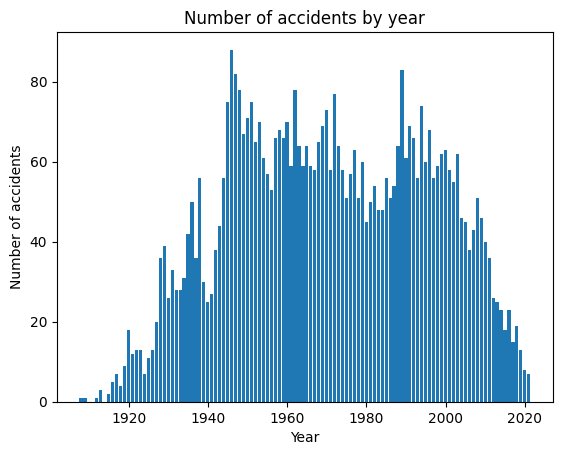

In [76]:
# Create Bar chart.
# Group dates by year and count how many dates there are per year.
count_by_year = df.groupby(df['Accident_Date'].dt.year).size()

# Create bar graph.
plt.bar(count_by_year.index, count_by_year.values)

# Customize the graphic.
plt.xlabel("Year")
plt.ylabel("Number of accidents")
plt.title("Number of accidents by year")

# Show the graph
plt.show()

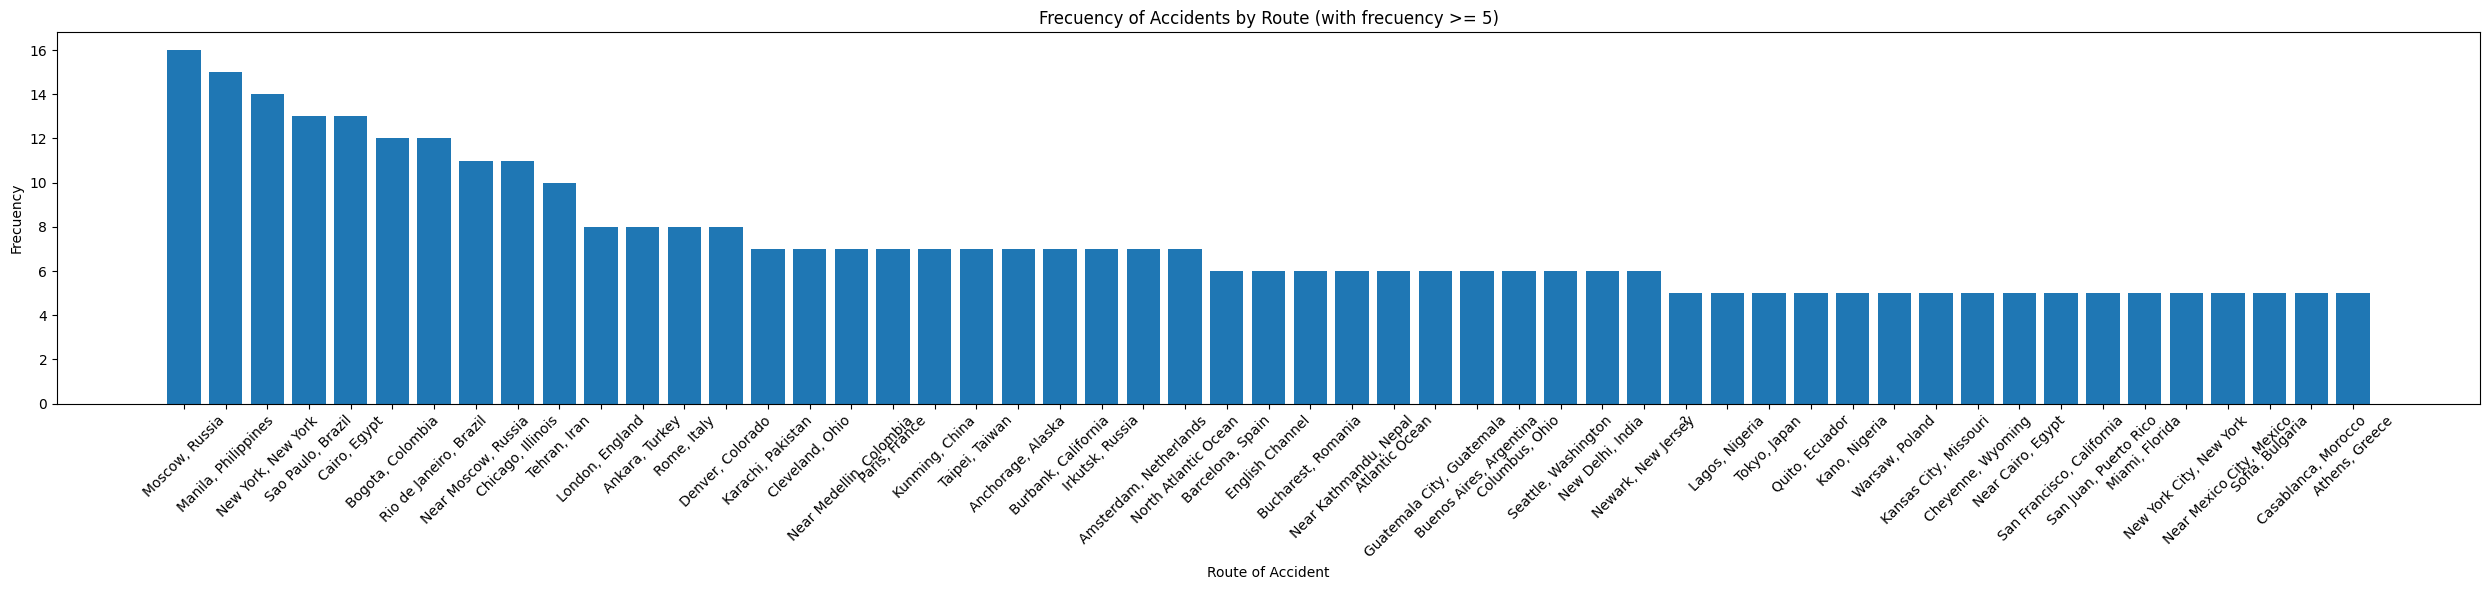

In [75]:
# Create Bar chart.
# Group data by year and by accident route, and count the number of accidents in each combination.
'''count_by_route_and_year = df.groupby([df['Accident_Date'].dt.year, 'Accident_Route']).size().unstack()

# Create the bar chart.
count_by_route_and_year.plot(kind='bar', stacked=True)

# Customize the chart.
plt.xlabel("Year")
plt.ylabel("Number of accidents")
plt.title("Number of accidents by route and year")

# Show the chart.
plt.show()''' # The graphic could not be generated because the image size in pixels (567 X 86525) is too large.

# Bar chart for a categorical variable Accident_Route grouped by this variable so that only Accident_Route>=5 is shown in the chart.

# Group the data by the categorical variable "Accident_Route" and count the frequency of each category.
route_count = df['Accident_Route'].value_counts()

# Filter categories that have a frequency of more than 5.
filtered_route_count = route_count[route_count >= 5]

# Create the figure and the axes of the graph.
fig, ax = plt.subplots(figsize=(25, 6))  # Adjust the size of the figure according to your needs.

# Create bar chart with filtered categories.
ax.bar(filtered_route_count.index, filtered_route_count.values)

# Customize the chart.
ax.set_xlabel("Route of Accident")
ax.set_ylabel("Frecuency")
ax.set_title("Frecuency of Accidents by Route (with frecuency >= 5)")

# Rotate x-axis labels for better readability.
plt.xticks(rotation=45)

# Adjust chart margins.
plt.tight_layout()

# Show the chart.
plt.show()

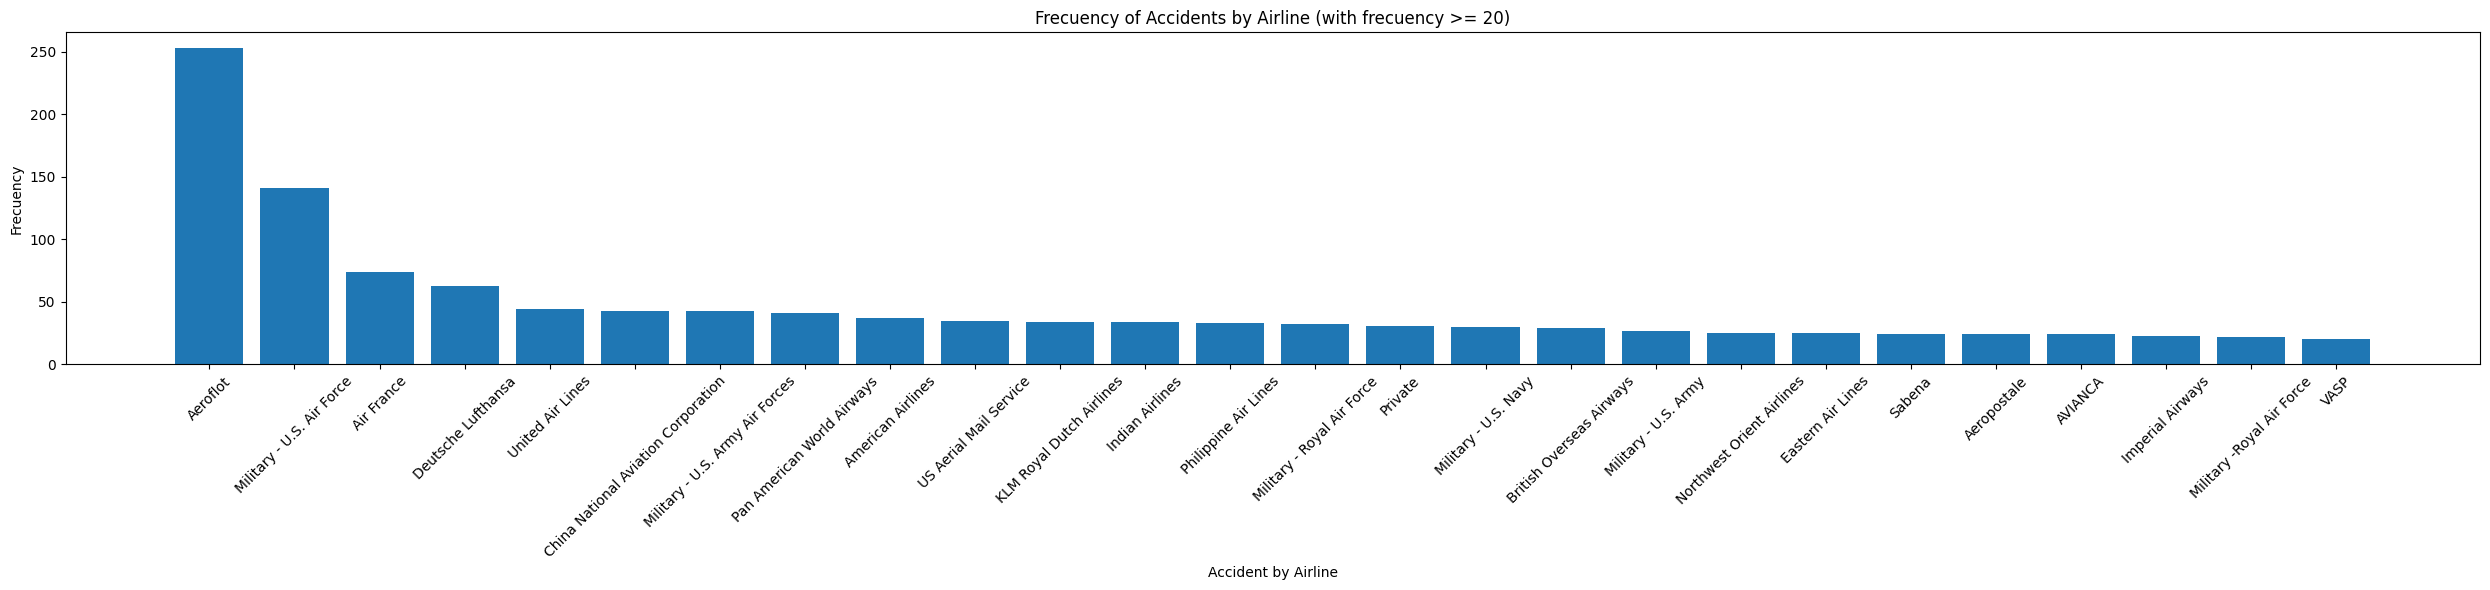

In [74]:
# Create Bar chart.
# Group the data by airline and count the number of accidents in each airline.
airline_counts = df['Airline'].value_counts()
# print(airline_counts)

# Filter categories that have a frequency of more than 20.
filtered_airlines_count = airline_counts[airline_counts >= 20]

# Create the figure and the axes of the graph.
fig, ax = plt.subplots(figsize=(25, 6))  # Adjust the size of the figure according to your needs.

# Ordenar los resultados en orden descendente
filtered_airlines_count = filtered_airlines_count.sort_values(ascending=False)

# Create bar chart with filtered categories.
ax.bar(filtered_airlines_count.index, filtered_airlines_count.values)

# Customize the chart.
ax.set_xlabel("Accident by Airline")
ax.set_ylabel("Frecuency")
ax.set_title("Frecuency of Accidents by Airline (with frecuency >= 20)")

# Rotate x-axis labels for better readability.
plt.xticks(rotation=45)

# Adjust chart margins.
plt.tight_layout()

# Show the chart.
plt.show()

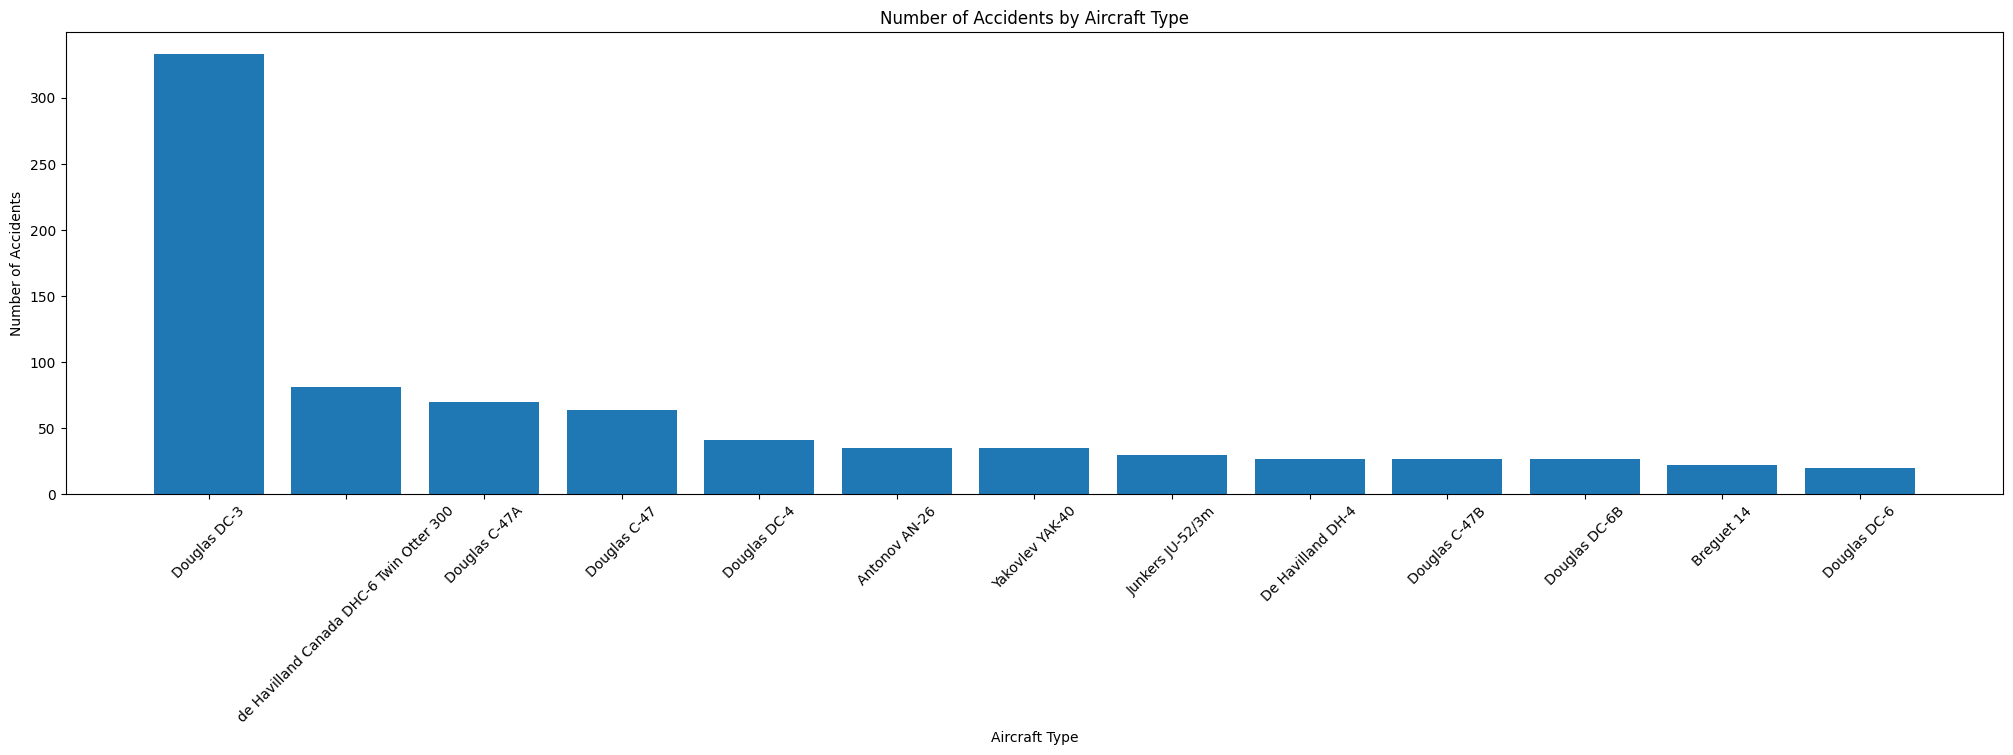

In [73]:
# Create Bar chart.
# Show the number of accidents by aircraft type.
# Group data by aircraft type and count the number of accidents in each type.
aircraft_type_count = df['Aircraft_Type'].value_counts()
# print(conteo_tipos_avion)

# Filter categories that have a frequency of more than 10.
filtered_tipo_Avion_count = aircraft_type_count[aircraft_type_count >= 20]

# Create the figure and the axes of the graph.
fig, ax = plt.subplots(figsize=(25, 6))  # Adjust the size of the figure according to your needs.

# Sort results in descending order.
filtered_tipo_Avion_count = filtered_tipo_Avion_count.sort_values(ascending=False)

# Create the bar chart.
plt.bar(filtered_tipo_Avion_count.index, filtered_tipo_Avion_count.values)

# Customize the chart.
plt.xlabel("Aircraft Type")
plt.ylabel("Number of Accidents")
plt.title("Number of Accidents by Aircraft Type")

# Rotate the x-axis labels for better readability.
plt.xticks(rotation=45)

# Show the graph.
plt.show()


In [72]:
# Calculate the frequency of words in the summaries and select the most common words as representatives of the main content. 
# Use NLTK or scikit-learn to perform text processing and word counting.

# Create an instance of the TfidfVectorizer vectorizer with stop words in English.
tfidf = TfidfVectorizer(stop_words='english')

# Adjust and transform abstract data for word counts.
X = tfidf.fit_transform(df['Summary'])

# Obtain the list of words.
palabras = tfidf.get_feature_names_out()

# Calculate word frequency.
frecuencia_palabras = X.toarray().sum(axis=0)

# Create a DataFrame with the words and their frequency.
df_frecuencia = pd.DataFrame({'Palabra': palabras, 'Frecuencia': frecuencia_palabras})

# Sorting the DataFrame by frequency in descending order.
df_frecuencia = df_frecuencia.sort_values('Frecuencia', ascending=False)

# Showing the most common words as representatives of the main content.
print(df_frecuencia.head(10))

       Palabra  Frecuencia
2551   crashed  301.193370
7182     plane  208.045918
706   aircraft  196.806246
3368    engine  133.447995
946   approach  123.116021
8117    runway  121.984718
7134     pilot  116.741533
3822    flight  115.864473
6270  mountain  107.109269
1802     cargo  106.976322


Bivariate analysis: Refers to the study and analysis of the relationship or association between two variables in a data set. 
It involves examining how two different variables behave or are related and understanding the nature of that relationship.

Objectives: 
* Identify patterns or trends.
* Compare groups or categories.
* Predicting or estimating values.

Graphics:
* Correlation matrix: Calculates the correlation between numerical variables, such as "People_Aboard" and "Number_Fatalities". 
* Scatter plot: To visualize the relationship between two numeric variables, such as "People_Aboard" and "Number_Fatalities". Each point on the graph represents an accident and its location on the x and y axis corresponds to the values of the two variables.
* Contingency table: Create a contingency table to analyze the relationship between two categorical variables, such as "Accident_Route" and "Airline". This table will show the frequency or count of category combinations of both variables.

Bivariate analysis will help you identify patterns, relationships and possible associations between variables in your data set.

                   People_Aboard  Number_Fatalities
People_Aboard           1.000000           0.739504
Number_Fatalities       0.739504           1.000000


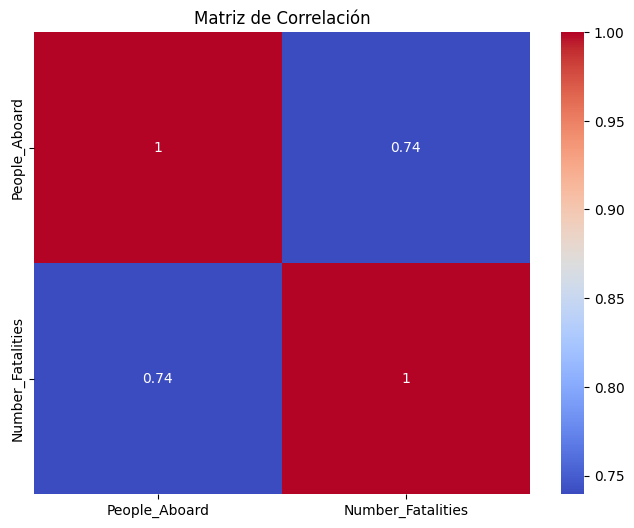

In [79]:
# Graph of Correlation matrix.
# Calculates the correlation matrix using the corr() method of the DataFrame.

correlation_matrix = df[['People_Aboard', 'Number_Fatalities']].corr()

# Prints the correlation matrix
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


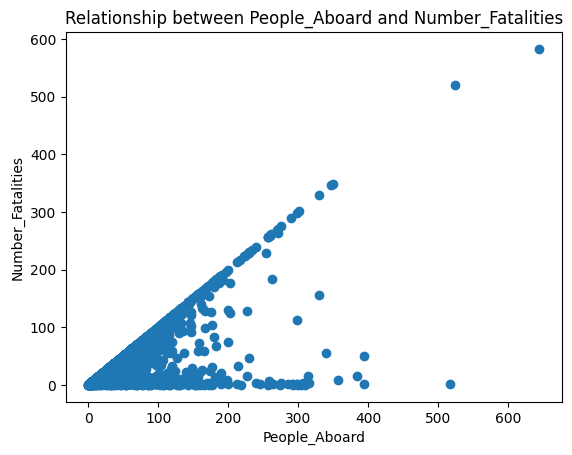

In [80]:
# Create the scatter plot.
plt.scatter(df["People_Aboard"], df["Number_Fatalities"])
plt.xlabel("People_Aboard")
plt.ylabel("Number_Fatalities")
plt.title("Relationship between People_Aboard and Number_Fatalities")

# Show the graph.
plt.show()

Accident_Route                              1,200 miles off Dakar, Atlantic Ocean   
Aircraft_Type                                                                       
?                                                                               0  \
A-7D Corsair                                                                    0   
AAC-1 Toucan                                                                    0   
AEGK                                                                            0   
AT L98 Carvair                                                                  0   
ATR 42-300                                                                      0   
ATR 42-320                                                                      0   
ATR 72-201                                                                      0   
ATR 72-212                                                                      0   
ATR 72-500                                                       